In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import gensim.downloader as api
model_gensim = api.load('word2vec-google-news-300')

In [2]:

import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [3]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state


In [4]:
column = 'clean_publicremarks'

In [5]:
noun_sentence_df = pd.read_feather('noun_sentences/' + file + '_withembeddings_erros_' + column + '_nounsentences_sentence_embedding.fea')


In [6]:
noun_sentence_df

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,Listing_Error_Indicators,noun_sentence_embeddings,noun_sentence_vaderpolarity
0,great mt vernon woods subdivision,1,0.599963,[0.5999625012919896],-0.032455,[-0.032454780361757106],[210208994],0.599963,-0.032455,[],[],"[0.013117646, 0.019790076, -0.025902215, 0.003...","[0.0, 0.494, 0.506, 0.6249]"
1,private lot decatur sought-after winnona park,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],[],"[0.020273924, 0.020105323, -0.012676716, -0.03...","[0.0, 1.0, 0.0, 0.0]"
2,inviting central foyer frames,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],[],"[-0.045703962, 0.068157814, -0.055449303, 0.05...","[0.0, 0.566, 0.434, 0.3182]"
3,incredible rear yard w/ limitless potential,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],[],"[0.032714177, -0.07150339, -0.07707424, -0.033...","[0.0, 1.0, 0.0, 0.0]"
4,geothermal youll,1,0.599767,[0.5997665174825175],-0.047552,[-0.04755244755244755],[6952860],0.599767,-0.047552,[],[],"[0.017892806, -0.02443172, -0.0288998, -0.0487...","[0.0, 1.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849013,combo brick,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[],"[0.007024779, -0.0017124295, -0.0627071, 0.057...","[0.0, 1.0, 0.0, 0.0]"
1849014,level lots boasts abundance shade,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[],"[-0.00205741, -0.06786402, -0.04747214, 0.0546...","[0.0, 1.0, 0.0, 0.0]"
1849015,straight foyer eat-in kitchen,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[],"[-0.0392266, 0.050290033, 0.004388458, 0.05048...","[0.0, 0.612, 0.388, 0.2263]"
1849016,wood storage sheds sits,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[],"[0.032563742, 0.05967781, 0.0041432604, 0.0453...","[0.0, 1.0, 0.0, 0.0]"


In [7]:
noun_sentence_df_50 = noun_sentence_df[noun_sentence_df['count']>50]

In [1]:
noun_sentence_df_50['AVM_Error_Indicators']

NameError: name 'noun_sentence_df_50' is not defined

In [9]:
noun_sentence_df_50 = noun_sentence_df[(noun_sentence_df['count']>50 ) & (noun_sentence_df['count']<=1000)]

In [10]:
len(noun_sentence_df_50)

10639

In [11]:
noun_sentence_df_1000 = noun_sentence_df[noun_sentence_df['count']>1000]

In [12]:
len(noun_sentence_df_1000)

639

In [13]:
noun_sentence_df_2000 = noun_sentence_df[noun_sentence_df['count']>2000]

In [14]:
len(noun_sentence_df_2000)

321

In [15]:

import seaborn as sns
sns.set()
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
    message_embeddings_ = model(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

def plot_similarity_serie(labelref, labels, rotation):
    #print(labelref)
    #print(labels)
    message_embeddings_ = model(labels)
    print(message_embeddings_.shape)
    messageref_embeddings_ = model(labelref) 
    corr = []
    for i in range(len(labels)):
        corr.append(np.inner(message_embeddings_[i,:],messageref_embeddings_))
    
    plt.plot(range(len(labels)),corr)
    plt.xticks(range(len(labels)),labels, rotation=rotation)
    plt.title(labelref)
    return corr

In [16]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
from scipy.stats import pearsonr
from gensim.models import Word2Vec

In [17]:

def plot_similarity_serie_error(labelref, labels, errors, rotation):
    #print(labelref)
    #print(labels)
    message_embeddings_ = model(labels)
    print(message_embeddings_.shape)
    messageref_embeddings_ = model(labelref) 
    corr = np.zeros(len(labels))
    cossim = np.zeros(len(labels))
    worddistance = np.zeros(len(labels))
    
    labelrefwords = labelref[0].split()
    print(labelrefwords)
    
    for i in range(len(labels)):
        labelwords = labels[i].split()
        A = np.array(message_embeddings_[i,:])
        B = np.array(messageref_embeddings_)
        #print(A.shape,B.shape)
        corr[i] = pearsonr(A,B[0])[0]
        #cossim[i] = cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))
        
        worddistance[i] = model_gensim.wmdistance(labelrefwords, labelwords)
        
    plt.plot(range(len(labels)),corr)
    plt.plot(range(len(labels)),worddistance)                                 
    
    for i, txt in enumerate(errors):
        plt.annotate(str(round(txt, 3)), xy =((range(len(labels)))[i], corr[i]), ha='center')
        
    plt.xticks(range(len(labels)),labels, rotation=rotation)
    plt.title(labelref)
    return corr, cossim, worddistance

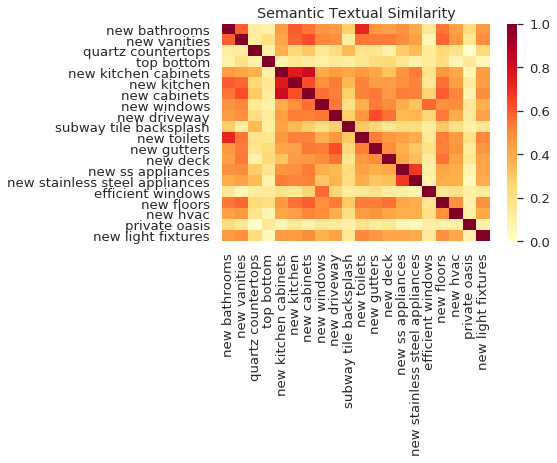

In [18]:
run_and_plot(list(noun_sentence_df_1000['noun_sentence'].values[:20]))

(40, 512)


[array([1.], dtype=float32),
 array([0.62533396], dtype=float32),
 array([0.49155614], dtype=float32),
 array([0.43917787], dtype=float32),
 array([0.45166826], dtype=float32),
 array([0.4889471], dtype=float32),
 array([0.51670927], dtype=float32),
 array([0.55545413], dtype=float32),
 array([0.43771717], dtype=float32),
 array([0.44962797], dtype=float32),
 array([0.31143486], dtype=float32),
 array([0.59457994], dtype=float32),
 array([0.5460185], dtype=float32),
 array([0.28505495], dtype=float32),
 array([0.13501224], dtype=float32),
 array([0.23239036], dtype=float32),
 array([0.33235767], dtype=float32),
 array([0.45153368], dtype=float32),
 array([0.59929276], dtype=float32),
 array([0.5745927], dtype=float32),
 array([0.1901815], dtype=float32),
 array([0.4918634], dtype=float32),
 array([0.1539138], dtype=float32),
 array([0.41599715], dtype=float32),
 array([0.21775827], dtype=float32),
 array([0.54251766], dtype=float32),
 array([0.56556576], dtype=float32),
 array([0.13580

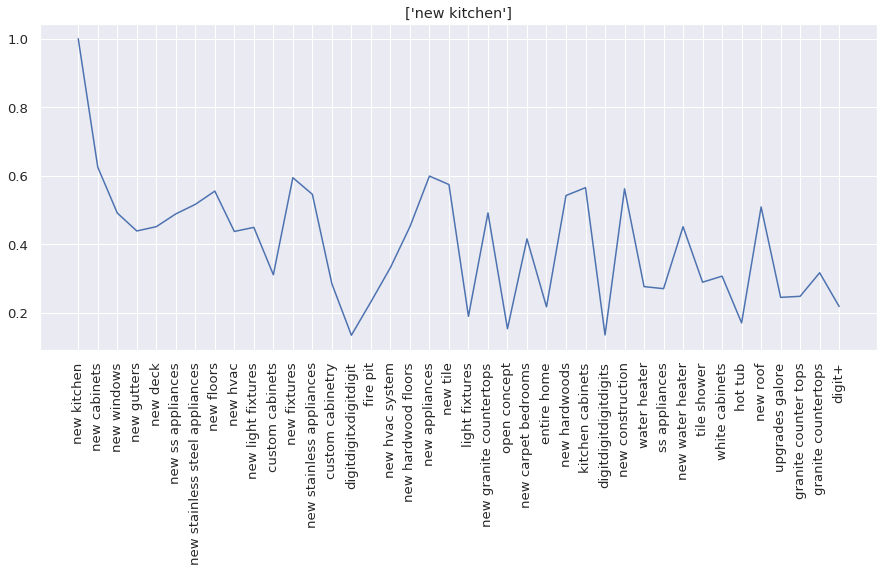

In [19]:

fig = plt.figure(figsize=(15, 6))
plot_similarity_serie([noun_sentence_df_2000['noun_sentence'].values[0]],
      list(noun_sentence_df_2000['noun_sentence'].values[:40]),90)

(40, 512)
['new', 'kitchen']


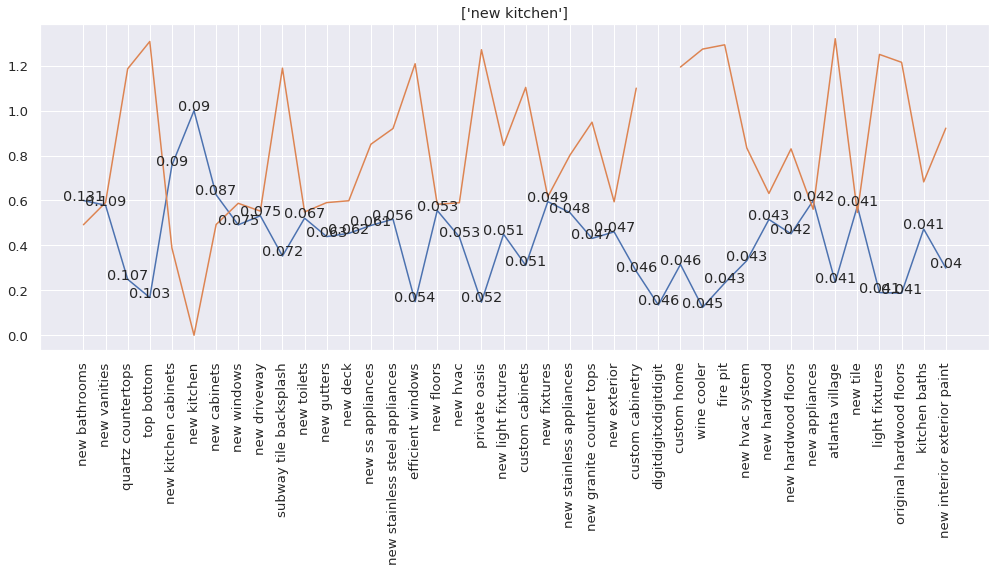

In [23]:
fig = plt.figure(figsize=(17, 6))
corr = plot_similarity_serie_error([noun_sentence_df_1000['noun_sentence'].values[5]],
                                    list(noun_sentence_df_1000['noun_sentence'].values[:40]),
                                    list(noun_sentence_df_1000['AVM_Error_Average'].values[:40]),90)
#print(np.array(corr).shape)
#plt.text(range(len(list(noun_sentence_df_2000['noun_sentence'].values[:40]))), 
#         corr, 
#         str(list(noun_sentence_df_2000['AVM_Error_Average'].values[:40])))

In [24]:
corr[2]

array([0.49199539, 0.59066151, 1.18613105, 1.30790061, 0.38872732,
       0.        , 0.49278836, 0.58746761, 0.55254862, 1.1892248 ,
       0.54879173, 0.59051388, 0.59878038, 0.85032186, 0.92047414,
       1.20889257, 0.58293755, 0.5899696 , 1.27127377, 0.84511183,
       1.10343081, 0.616278  , 0.80143589, 0.94862353, 0.59413358,
       1.10001824,        inf, 1.19414251, 1.27401261, 1.29308992,
       0.83378257, 0.63127563, 0.82979903, 0.56093664, 1.32023018,
       0.54645275, 1.25028119, 1.21512743, 0.68276456, 0.92182679])

(40, 512)


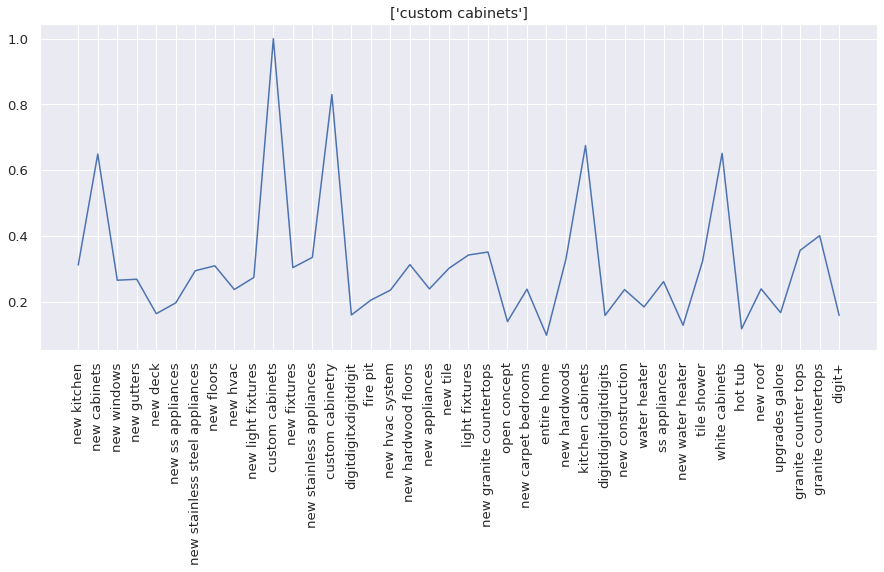

In [25]:
fig = plt.figure(figsize=(15, 6))
corr = plot_similarity_serie([noun_sentence_df_2000['noun_sentence'].values[10]],
      list(noun_sentence_df_2000['noun_sentence'].values[:40]),90)

(40, 512)


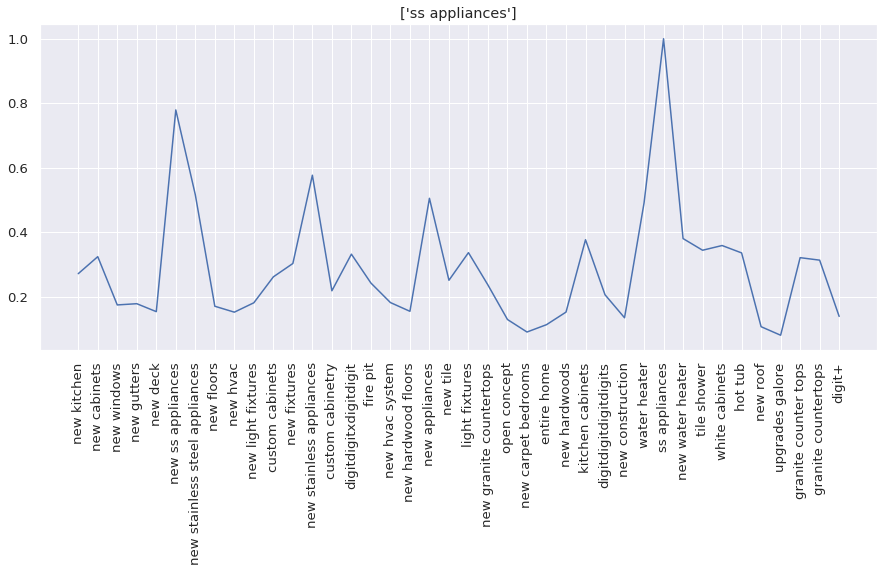

In [26]:
fig = plt.figure(figsize=(15, 6))
corr = plot_similarity_serie([noun_sentence_df_2000['noun_sentence'].values[30]],
      list(noun_sentence_df_2000['noun_sentence'].values[:40]),90)

In [27]:
np.inner(np.array([0,1]),np.array([0,1]))

1

In [28]:
list_of_noun_sentences

NameError: name 'list_of_noun_sentences' is not defined

In [29]:
list_of_embeddings

NameError: name 'list_of_embeddings' is not defined

In [30]:
sentence_possibilities = noun_sentence_df_1000['noun_sentence'].values

In [31]:
sentence_possibilities

array(['new bathrooms', 'new vanities', 'quartz countertops',
       'top bottom', 'new kitchen cabinets', 'new kitchen',
       'new cabinets', 'new windows', 'new driveway',
       'subway tile backsplash', 'new toilets', 'new gutters', 'new deck',
       'new ss appliances', 'new stainless steel appliances',
       'efficient windows', 'new floors', 'new hvac', 'private oasis',
       'new light fixtures', 'custom cabinets', 'new fixtures',
       'new stainless appliances', 'new granite counter tops',
       'new exterior', 'custom cabinetry', 'digitdigitxdigitdigit',
       'custom home', 'wine cooler', 'fire pit', 'new hvac system',
       'new hardwood', 'new hardwood floors', 'new appliances',
       'atlanta village', 'new tile', 'light fixtures',
       'original hardwood floors', 'kitchen baths',
       'new interior exterior paint', 'tile bathrooms',
       'new granite countertops', 'open concept', 'kitchen bathrooms',
       'new carpet bedrooms', 'interior exterior', 'en

In [32]:

keys_list = list(noun_sentence_df['noun_sentence'].values)
values_list = [[] for i in range(len(keys_list))]
noun_sentences_dictionary = dict(zip(keys_list, values_list))

In [33]:
list_of_noun_sentences = []
list_of_noun_sentences.append(noun_sentence_df_1000['noun_sentence'].values[0])

list_of_embeddings = []
list_of_embeddings.append(noun_sentence_df_1000['noun_sentence_embeddings'].values[0])

for idd in range(len(noun_sentence_df_1000)):
#for idd in range(50):
    if (idd%30==0): print(idd,len(noun_sentence_df_1000))
    labelrefwords = noun_sentence_df_1000['noun_sentence'].values[idd].split()
    corrs = np.zeros(len(list_of_noun_sentences))
    #distances = np.zeros(len(list_of_noun_sentences))
    #print(corrs)
    for jdd in range(len(list_of_noun_sentences)):
        labelwords = list_of_noun_sentences[jdd].split()
        corrs[jdd] = pearsonr(noun_sentence_df_1000['noun_sentence_embeddings'].values[idd],
                      list_of_embeddings[jdd])[0]
        #distances[jdd] = model_gensim.wmdistance(labelrefwords, labelwords)
    #print(corrs)
    #print((corrs<0.79) & (distances>0.5))
    #temp = corrs[((corrs<0.79) & (distances>0.5))]
    temp = corrs[(corrs<0.8)]
    #print(len(temp)==len(list_of_noun_sentences))
                          
    if (len(temp)==len(list_of_noun_sentences)):
        list_of_noun_sentences.append(noun_sentence_df_1000['noun_sentence'].values[idd])
        list_of_embeddings.append(noun_sentence_df_1000['noun_sentence_embeddings'].values[idd])
    else:
        if (len(corrs[(corrs>=0.8) & (corrs!=1)])>0):
            #print(list_of_noun_sentences)
            #print(list((corrs>=0.8) & (corrs!=1)))
            #print(list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)]))
            temp_list = noun_sentences_dictionary[list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]]
            #print(temp_list)
            temp_list.append(noun_sentence_df_1000['noun_sentence'].values[idd])              
            noun_sentences_dictionary[list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]] = temp_list         

0 639
30 639
60 639
90 639
120 639
150 639
180 639
210 639
240 639
270 639
300 639
330 639
360 639
390 639
420 639
450 639
480 639
510 639
540 639
570 639
600 639
630 639


In [34]:
    

for idd in range(len(noun_sentence_df_50)):
#for idd in range(2):
    if (idd%10==0): print(idd,len(noun_sentence_df_50))
        
    count = 0
    corr = 0
    
    noun_sentence_df_50['noun_sentence_embeddings'].values.shape
    
    while ((corr < 0.8) & (corr!=1)):
        #print(noun_sentence_df_50['noun_sentence'].values[idd], ' -- ', list_of_noun_sentences[count])
        corr = pearsonr(noun_sentence_df_50['noun_sentence_embeddings'].values[idd],
                      list_of_embeddings[count])[0]
        
        count += 1
        
        #print(corr,count,len(list_of_embeddings))
        
        if (count==len(list_of_embeddings)):
            list_of_noun_sentences.append(noun_sentence_df_50['noun_sentence'].values[idd])
            list_of_embeddings.append(noun_sentence_df_50['noun_sentence_embeddings'].values[idd])
            print(idd,'new', noun_sentence_df_50['noun_sentence'].values[idd])
            break
        
    else:
        print(corr,count,len(list_of_embeddings))
        temp_list = noun_sentences_dictionary[list_of_noun_sentences[count-1]]
        temp_list.append(noun_sentence_df_50['noun_sentence'].values[idd])
        noun_sentences_dictionary[list_of_noun_sentences[count-1]] = temp_list 
    


0 10639
0 new luxurious baths
1 new new shaker cabinets
2 new chefs kitchen w/ ss appliances
3 new tack room
4 new new drywall
0.8316173077983571 50 488
6 new perkerson park
7 new new hall bath
8 new stall barn
0.8572136716476111 488 491
10 10639
0.841702098475388 485 491
11 new amazing renovation
12 new monday night garage
13 new minutes beltline
14 new digit-stall
0.82221376658618 492 495
16 new contemporary finishes
0.8708093919524498 485 496
18 new modern farmhouse
0.8201431174092944 95 497
20 10639
20 new new master suite
0.9999999999999998 430 498
0.874505114472234 492 498
23 new modern renovation
0.9352998759389431 492 499
25 new custom barn doors
1.0 3 500
0.8119118746066543 50 500
28 new new systems
29 new mercedes benz stadium
30 10639
30 new new white kitchen
0.8113218997981887 1 503
32 new omission and/or
33 new modern design
34 new amp service
35 new high end s.s. appliances *
36 new custom vent hood
37 new top bottom renovation
38 new doors drawers
39 new designer fixture

323 new new vanity
0.8317218581808927 383 709
325 new plush carpet
326 new anderson windows
0.8593855983873655 52 711
0.9273732400727015 492 711
329 new piece paradise
330 10639
0.9267607122717745 5 712
331 new patio pool
0.8827757613156628 702 713
333 new extra large island
0.8650666167958513 608 714
0.896320921927813 30 714
0.8705299204259738 1 714
337 new decorative fireplace
0.8150291905622643 185 715
339 new modern cabinets
340 10639
0.8549073147247519 592 716
341 new updates list
342 new new cement
343 new one-of-a-kind home
344 new new custom cabinetry
345 new pool spa
0.8459776887776078 36 721
0.8133556039137553 364 721
0.8004479270915075 22 721
349 new ready february
350 10639
350 new main double vanities
0.8542686925215064 33 723
0.8977145336273282 184 723
353 new electric panel
0.8856978422182327 517 724
355 new porch w/ fireplace
356 new need storage
357 new future beltline
358 new arch roof
359 new new master bathroom
360 10639
0.8098260454471162 72 729
361 new beautiful t

649 new floors bathrooms
650 10639
650 new digitdigitxdigitdigit digit
651 new retail district
652 new wooden beams
653 new new patio
654 new large deck outdoor
655 new ice maker
656 new high end
657 new incredible curb appeal
658 new digitdigit-foot
659 new new pool liner
660 10639
660 new zoysia grass
661 new vegetable garden
0.8143105644729729 42 946
0.8219385090331752 208 946
664 new beautiful bath
665 new private virtual tour
666 new spacious open concept
667 new granite stainless steel appliances
668 new bamboo hardwoods
669 new concrete floor
670 10639
0.8749469340557954 678 952
0.8459051804576112 715 952
672 new interior designer
673 new fabulous owners suite
674 new trash compactor
0.8330151428371859 645 955
676 new professional appliances
677 new full apartment
678 new claw foot tub
679 new state art kitchen
680 10639
680 new beautiful living room
0.8102377295758809 80 960
682 new top line appliances
683 new chefs dream
684 new stone shower
685 new gorgeous master bath
686 ne

962 new dead gorgeous
963 new complete wet
964 new tv area
0.8934514844775873 27 1139
0.875927130521131 201 1139
967 new shower bench
0.8245506216528053 134 1140
969 new fault seller
970 10639
970 new digit+acres
971 new new lvt
0.8377712698242388 62 1143
973 new new faucets
974 new beautiful country setting
975 new multiple vehicles
976 new attic insulation
977 new family members
978 new inman park
0.846710348540799 14 1149
980 10639
980 new stone wall
981 new leaf guard gutters
0.8406151375421853 431 1151
0.8176598585037363 40 1151
984 new spacious hall bath
1.0 385 1152
986 new classic style
987 new ready new homeowner
988 new tile hardwoods
0.8228309233752851 688 1155
990 10639
990 new perfect reading
991 new wood stove
0.8119635042151157 156 1157
993 new new bamboo floors
994 new full lawn mtnc incld focus life
995 new space w/
0.8256141218175205 952 1160
997 new new septic
998 new frank lloyd wright
0.8317119599307363 22 1162
1000 10639
1000 new new pump
1001 new double shower
10

1.0 1241 1345
1275 new door hardware
0.8224074956095602 968 1346
1277 new backyard oasis
0.8314478783450518 22 1347
1279 new public records
1280 10639
1280 new new sod
0.8068374345904533 1241 1349
1282 new gourmet kitchen w/stainless steel appliances
1283 new master suite w/ walk-in closet
1284 new minutes decatur
0.8447211337728694 69 1352
1286 new family space
1287 new entry doors
1.0 78 1354
1289 new hardie plank
1290 10639
1290 new blocks park
1291 new designer upgrades
0.8075595086691905 166 1357
1293 new happy home
0.8007398483986186 344 1358
1295 new perfect combination
1296 new travertine shower
0.8853905196038514 708 1360
1298 new large mudroom
0.8666728775580107 23 1361
1300 10639
1300 new master retreat envy
0.8828175090688184 1239 1362
0.8496278293311208 57 1362
0.9232752814742327 46 1362
1304 new perfect extra storage
1305 new time outdoors
1306 new youll fall
1307 new time summer
0.8005235369072914 91 1366
1309 new dishwasher microwave
1310 10639
1310 new private sanctuar

1581 new main floor bedrooms
1582 new concept floor plan
0.8161724481844603 899 1538
0.8066285125543609 82 1538
1585 new fixtures *
1586 new stainless steel fridge
1587 new hartsfield airport
1.0 115 1541
0.8255561775440776 87 1541
1590 10639
0.8833384091795431 112 1541
1591 new kitchen upgrades
0.8785126352245309 1173 1542
0.8509739192727794 22 1542
0.8647352505744529 292 1542
1595 new plan w/
1596 new remote control
0.8509715828325441 165 1544
1598 new extra garage
0.8247263822332364 190 1545
1600 10639
1600 new excellent area
1601 new pristine hardwoods
1602 new owners suite w/
0.8640396577241658 592 1548
1604 new area owners
1605 new beauty home
0.8751736069951475 276 1550
0.8659341707045425 1185 1550
0.9999999999999999 824 1550
1609 new digitm
1610 10639
1610 new buyers fall
1611 new pine floors
0.8894163997138247 950 1553
0.8038865298810903 131 1553
1614 new garden beds
1615 new interior boasts
1.0 476 1555
1617 new outdoor fp
1618 new hot water tank
1619 new s dream
1620 10639
0

1890 new area pets
1891 new home wow
0.816270589702704 641 1734
0.8704280603769166 703 1734
1894 new moment step
0.8116121499939517 1106 1735
0.8209512487176447 169 1735
1897 new new hdigito heater
0.8636470115887662 178 1736
0.876592407858062 17 1736
1900 10639
0.8138937607077832 1557 1736
0.882856096261275 1084 1736
1902 new perfect boat
1903 new multiple living spaces
1904 new unique features
0.8890556319902487 166 1739
1906 new porch w/fp
1907 new incredible location minutes i-digitdigit
1908 new new upgrades
1909 new built-in pantry
1910 10639
1910 new local restaurants
0.848989406012921 117 1744
1912 new private outdoor
0.9188815019216937 71 1745
0.842956227703205 1185 1745
0.9258357554061107 1540 1745
0.8889849746413987 907 1745
0.841161057985262 156 1745
0.939217295540588 206 1745
1919 new acre retreat
1920 10639
1920 new open concept designs spaces
1921 new lovely foyer
0.9019618409192561 1345 1748
1923 new community dock
0.8413649910470462 50 1749
0.824526670818075 73 1749
0.

0.8854003175757603 1376 1909
0.8141138888403838 27 1909
2193 new true ranch
2194 new wine closet
2195 new traditional brick ranch
2196 new entertainment deck
0.822752986349863 398 1913
0.8460794640359579 809 1913
0.8188795344069928 216 1913
2200 10639
2200 new charming cottage
0.8942267371752071 1854 1914
0.8295595405871214 1406 1914
0.8742741861029455 103 1914
0.9606540856849377 1602 1914
2205 new virginia highlands
2206 new shower walk-in closet
2207 new huge owners
2208 new water filtration system
2209 new open porch
2210 10639
2210 new view lake
2211 new expansive living room
0.8429367355396253 80 1921
2213 new natural light floods
2214 new mature plantings
0.8630795991490856 217 1923
0.831938188582031 47 1923
2217 new peace mind
2218 new digitbdr
2219 new beautiful floor
2220 10639
2220 new perfect den
2221 new dbl pane windows
0.8163935353413754 124 1928
2223 new swim/tennis club
2224 new popular open floor plan
2225 new amazing privacy
2226 new secondary bedrooms laundry room
22

2497 new automatic garage door opener
0.8944617542711347 1483 2099
2499 new beautiful wood cabinets
2500 10639
2500 new bedrooms w/
2501 new pleasure show
0.8973829148328623 196 2102
0.8075015605474771 1317 2102
0.8109929288156483 732 2102
0.8271731758291773 126 2102
2506 new complete w/
2507 new electrical outlets
2508 new special home
0.813793986141539 51 2105
2510 10639
0.8209995675489103 1084 2105
2511 new dual vanity bath
2512 new photos home plan
2513 new bsmt w/
0.8444069381906194 1124 2108
0.8136140127481961 80 2108
2516 new floor bedrooms
0.8841759191140124 205 2109
0.8365366280580953 282 2109
2519 new beautiful historic home
2520 10639
0.8482986195875087 770 2110
0.8194427240570568 251 2110
2522 new professional photos
0.8759894817569707 571 2111
0.8048990124489703 1422 2111
2525 new theatre room
2526 new cost use
0.832103330920289 1248 2113
2528 new spacious additional bedrooms
0.8335752968361325 648 2114
2530 10639
2530 new digit-acre
2531 new new air
2532 new beautiful vie

2800 new brookfield country club
2801 new sure check
1.0 1435 2271
2803 new quality abounds
2804 new beautiful new hardwoods
0.8577241750051521 1472 2273
2806 new separate cook top
2807 new tons character
2808 new new int
0.8663774958911952 395 2276
2810 10639
2810 new blinds windows
2811 new private porch
0.8150910210175855 1241 2278
0.8356214384897829 311 2278
2814 new frieze carpet
2815 new open concept kitchen
0.9150259176817785 1595 2280
0.8351406796093706 1434 2280
2818 new main campus
0.8530048416321978 282 2281
2820 10639
2820 new movable island
2821 new charming fireplace
0.8093852200291234 350 2283
2823 new easy commute airport
0.8086865999992319 2046 2284
2825 new owner retreat
2826 new hdwds thruout
2827 new remarkable swim community
0.8313341585742646 1710 2287
2829 new tanger outlets
2830 10639
2830 new massive walk closet
0.8299512366603699 991 2289
2832 new city water
2833 new dunwoody home
0.8212200512598617 124 2291
0.8442548580934433 90 2291
2836 new oversize master 

3104 new storage barn
0.8722279022845976 339 2446
3106 new main level hardwood
3107 new easy access i-digitdigit hwy
0.9317797408515486 985 2448
0.8055248029863666 1890 2448
3110 10639
0.813445547296662 165 2448
3111 new upstairs family room
3112 new amazing closet
3113 new private door
0.8184139242805542 598 2451
3115 new showcase home
0.8360620483315915 1623 2452
3117 new elegant master suite
3118 new prime roswell location
0.8158737828483322 71 2454
3120 10639
0.8397009479586861 983 2454
0.8326555798834232 333 2454
3122 new beautiful new home
3123 new digit.digitdigitac
0.8407474315066326 1078 2456
3125 new digit-level
0.8081241811295425 139 2457
3127 new tree house
3128 new ceilings tons
3129 new remarkable ranch
3130 10639
3130 new upper deck
3131 new ample space
3132 new quiet living
3133 new flat front
0.8280942485461775 152 2464
3135 new backyard w/ patio
3136 new work area
0.8211488195612486 597 2466
3138 new perfect teen/in-law suite
3139 new sunroom w/
3140 10639
0.924396655

0.9352369443665518 2195 2615
3407 new homes price
3408 new digit-years
3409 new inviting entry foyer
3410 10639
3410 new master suite w/fireplace
0.8265509191673854 2189 2619
3412 new quick access hwy
0.9111075700826727 46 2620
0.8230349610083824 2344 2620
3415 new hillgrove hs district
3416 new main +
3417 new additional living room
3418 new family rm w/stone fireplace
3419 new cookie cutter
3420 10639
3420 new family dinners
3421 new inviting sunroom
0.9604118089073034 2011 2627
3423 new great spot
0.8120765355413879 1254 2628
3425 new whole house humidifier
0.8020872373531568 2467 2629
0.8864349230481501 313 2629
0.8242153355163853 1001 2629
0.8780435690318433 416 2629
3430 10639
3430 new walk-out backyard
0.8671427896596303 675 2630
3432 new smart home technology
0.9037420839661959 1513 2631
3434 new parkview high school district
0.8105375946540645 101 2632
3436 new trane hvac
3437 new warm colors
0.823527813615587 148 2634
3439 new full bath laundry
3440 10639
0.8133087217772329 1

3705 new additional bed
0.912017847091692 66 2774
3707 new teen/in-law suite
0.8127624526913364 76 2775
0.9103410809961693 1329 2775
3710 10639
0.8581153234435094 1403 2775
0.8917938909862294 85 2775
0.8222128610327475 370 2775
3713 new ceilings lots
3714 new market fault seller
0.869618245353274 1724 2777
3716 new story craftsman
3717 new minutes suntrust park
3718 new double bowl vanity
0.9310777158455937 756 2780
3720 10639
0.8428912651966856 247 2780
0.9053611406041747 1886 2780
3722 new porches front
1.0 2658 2781
3724 new deep garage
3725 new home market
0.8605122460615906 134 2783
3727 new large lr
3728 new craft room
3729 new ball fields
3730 10639
0.8547249466880836 93 2786
0.8018317906829044 32 2786
3732 new theres place
3733 new car port
3734 new perfect playroom
3735 new beautiful laminate
3736 new ... dont
0.8322354892897221 204 2791
3738 new backyard kids
0.8054415302659055 217 2792
3740 10639
3740 new in-law teen suite
0.8238186668884377 1673 2793
0.8151117691849374 261 

0.9167386989974664 2181 2933
0.8297275178372966 2826 2933
4007 new full acre
0.8829302220125403 163 2934
0.8267819483039781 1107 2934
4010 10639
4010 new small office
4011 new main level french doors
0.9143568870346102 46 2936
0.8398339188083422 267 2936
0.8263472185419549 2340 2936
4015 new huge wic
4016 new dual hvac
4017 new perfect cooking
4018 new real beauty
4019 new shop area
4020 10639
0.9328569669489597 193 2941
4021 new fireside den
4022 new southern charmer
4023 new perfect level
0.831171194404732 156 2944
4025 new spacious master bedroom walk closet
0.9048242563578752 1522 2945
4027 new new roof hvac
4028 new digityrs
0.9102984439471405 396 2947
4030 10639
0.8349993930918975 2750 2947
0.8661345742910834 465 2947
4032 new worth upgrades
4033 new study room
0.8405689223907967 204 2949
0.9018410439012755 131 2949
0.8991220227596565 1127 2949
4037 new additional kitchen
4038 new separate water closet
4039 new acre park
4040 10639
4040 new area family room
0.8139206205460705 243

4311 new hobby room
4312 new swim/tennis optional
4313 new seller contribute
0.8858642792387108 467 3112
0.8373777184702007 409 3112
4316 new beautiful landscape
4317 new hartsfield jackson airport
4318 new tot lot
4319 new digitbedroom digit.digit
4320 10639
0.9999999999999998 227 3116
4321 new mins i-digitdigit
0.8167640894625565 147 3117
0.8498948915296114 2890 3117
4324 new big ticket items
4325 new ample room
4326 new town brookhaven
0.9196516436765185 2533 3120
4328 new home shows
0.8966483450252951 141 3121
4330 10639
0.9053659498243645 34 3121
4331 new br bath
4332 new open floorpan
4333 new step-less entry
0.8826565804228237 169 3124
4335 new access patio
0.8193054876536039 139 3125
4337 new classic home
0.8878546310376 2982 3126
4339 new bonus/digitth bedroom
4340 10639
4340 new great restaurants
4341 new front windows
0.8379440817262244 1662 3129
4343 new bedroom garage
4344 new easy one-level
4345 new mstr ste
0.9024777059575689 131 3132
4347 new pool rm
4348 new kennesaw s

4612 new home pristine
4613 new kitchen access
4614 new home inspection
4615 new great use space
0.8900131160308871 2768 3273
4617 new new cooktop
4618 new multiple fireplaces
4619 new large master ste
4620 10639
0.8007584908294142 2513 3276
0.8783177922134479 1395 3276
0.9505909056029019 141 3276
0.8613396149178003 34 3276
0.8059978887182472 47 3276
4625 new available buyers
1.0 1475 3277
4627 new open flow
0.8291865944587974 120 3278
4629 new spacious living room fireplace
4630 10639
4630 new area office
0.889320540315995 376 3280
4632 new relax deck
0.8509858838235635 388 3281
0.9067064982849559 1088 3281
0.8373666077702957 208 3281
0.8015143903828946 208 3281
4637 new house boasts
4638 new great room fp
4639 new cabinet hardware
4640 10639
0.8188611499935204 184 3284
0.8725041190090719 2370 3284
4642 new sun room kitchen
0.9012998120035219 323 3285
0.8637522002700072 2893 3285
4645 new private view
4646 new inviting living room
4647 new home buyers warranty
4648 new possible bedroo

4910 new quiet s/d
4911 new new carpet stairs
0.83431163815673 231 3428
4913 new car side entry
4914 new master +
4915 new fireside family rm
0.8861090316795299 2409 3431
0.8731848262717707 1226 3431
1.0 66 3431
0.8022054881677578 99 3431
4920 10639
1.0 378 3431
1.0 1617 3431
0.8357922692037116 283 3431
0.804031953676895 924 3431
4924 new spacious media room
4925 new medical center
0.8393675966210523 148 3433
4927 new eat-in kitchen view family room
0.8815226922671173 206 3434
4929 new miles ga
4930 10639
4930 new wow ...
4931 new bd/digit.digit ba home
4932 new extra hardwoods
0.8197334492829451 277 3438
4934 new double crown
0.8133459527485021 410 3439
4936 new schedule appt
4937 new water closet
4938 new upstairs storage
0.8178733867994825 80 3442
4940 10639
0.8081694108146416 1438 3442
4941 new full bed/bath
4942 new tons extras
0.8149975123987963 2304 3444
0.80588708118468 273 3444
0.9096516768904053 1147 3444
0.8235717950934216 141 3444
4947 new new place
0.8910606228570831 1630 

5210 new warm winter
0.8533765385367437 231 3589
1.0 2286 3589
0.8244978259150593 398 3589
0.9051358107017684 3183 3589
0.8436700568870882 2562 3589
0.8980740243344725 2164 3589
5217 new huge mstr suite
0.8909001489030172 1835 3590
5219 new large office
5220 10639
0.8032888232836779 229 3591
0.8292829951254173 3010 3591
5222 new luxurious owners retreat
0.831714876762041 307 3592
0.852386862569189 2977 3592
5225 new easy commute atlanta
5226 new rooms *
5227 new full bath office
5228 new home depot
1.0 1560 3596
5230 10639
0.8338336620756311 72 3596
0.8318012576883602 2565 3596
5232 new dbl vanities
0.8322119958301122 313 3597
5234 new sand volleyball
5235 new computer room
5236 new hardwood floors lr
5237 new lg walk-in closet
0.8238802149002338 2573 3601
5239 new open kitchen family room
5240 10639
5240 new digit-minute
0.8227567835653447 1520 3603
0.8269123022035336 143 3603
5243 new main w/digit
5244 new abundance cabinet space
5245 new granite countertops hardwood floors
0.8032717

0.8714062967065225 3454 3740
0.8307807697367244 1662 3740
5506 new full length
5507 new rec space
0.8655394432629119 2092 3742
0.8852325203450427 2903 3742
5510 10639
0.8036437290817833 1981 3742
0.8948611217379192 331 3742
5512 new spindles staircase
5513 new elegant crown
0.8264833083609118 320 3744
0.889697999207497 298 3744
0.8611759427535798 1516 3744
0.8387565796086388 1721 3744
0.9077818086931628 1931 3744
0.847437280348542 2448 3744
5520 10639
0.8146135507372041 85 3744
5521 new room high
1.0 2321 3745
5523 new large walk closets
0.8043378115097346 1898 3746
5525 new flat driveway
5526 new generous size
5527 new playground lake
0.8137230159412011 1045 3749
5529 new free exterior
5530 10639
0.8628502525425527 176 3750
0.8799394467325753 3174 3750
5532 new awesome backyard
0.8332315928266005 164 3751
5534 new entertainment room
5535 new breakfast area view
5536 new great view backyard
0.8064592281899583 942 3754
0.8177895633792798 1484 3754
5539 new huge sun room
5540 10639
5540 

5801 new marble bathrooms
0.8024551613684203 1418 3885
0.8563541115321947 2081 3885
0.8399127869779334 1893 3885
5805 new double door entry
5806 new large double
5807 new parks schools
0.8102258118803968 2061 3888
0.8627424380544203 1109 3888
5810 10639
5810 new generous master
5811 new desirable johns creek
5812 new upstairs home
0.9300653889734654 465 3891
0.8824967543912969 1861 3891
5815 new laundry areas
0.8128993841032099 257 3892
5817 new end street
5818 new bonus space
0.9004956775052644 3286 3894
5820 10639
5820 new sep cooktop
0.8082553968017077 1207 3895
5822 new cabinets breakfast area
0.8407078476307508 2009 3896
5824 new convenient interstates
0.8156645238599718 182 3897
0.815377620611371 128 3897
5827 new chair railing
5828 new huge walk pantry
0.8215308136558896 317 3899
5830 10639
0.8712560928750324 1166 3899
0.8002006886893515 169 3899
0.8705411656760383 3549 3899
0.8575957981793214 1127 3899
0.8339682816675104 3292 3899
5835 new story foyer hardwood
0.825845299545152

6096 new open breakfast area kitchen
6097 new beautiful windows
0.8019410793780808 143 4013
6099 new earthcraft home
6100 10639
6100 new private level
6101 new jackson school district
0.8407008304739703 2767 4016
6103 new story foyer welcomes home
6104 new kitchen heart home
0.8086703110274103 258 4018
1.0 79 4018
6107 new decorative columns
6108 new sunroom deck
0.9407191022874608 1511 4020
6110 10639
0.8317035237161693 845 4020
6111 new elementary district
0.8897250111840299 226 4021
0.9212524692809081 1780 4021
6114 new peaceful neighborhood
0.8246240815699488 316 4022
0.8062268797172774 137 4022
0.856647473243974 2462 4022
0.877337668220968 174 4022
6119 new spacious fireside
6120 10639
0.8081965153982968 1750 4023
0.8806698259530326 3065 4023
0.8365240654270281 1635 4023
6123 new large light
0.820460564715026 3004 4024
0.9408976765467145 2404 4024
6126 new great room gas log fireplace
0.8049976180947942 2476 4025
0.8499003380458492 2409 4025
0.8255654670977217 1570 4025
6130 10639

6389 new acre lake
6390 10639
0.8122918515109077 276 4140
6391 new spacious master retreat
6392 new milton school district
0.8333623385480458 3986 4142
6394 new new sod front yard
6395 new nice features
0.8120923381077164 193 4144
6397 new national recreation area
6398 new private en-suite bath
6399 new double cul-de-sac
6400 10639
6400 new great play
0.8082963119097133 1093 4148
6402 new large rear yard
0.8236526475419399 100 4149
6404 new convenient cdc
6405 new low maint
6406 new low maintenance vinyl exterior
0.8639255254815892 410 4152
0.8044053144421287 3344 4152
0.8125814598531427 1557 4152
6410 10639
6410 new his/her vanities
6411 new pool tennis court
0.8346120583524801 80 4154
0.8030673392561012 3677 4154
6414 new ample cabinetry
6415 new open kitchen granite counters
0.8228740666036628 135 4156
6417 new deck access
6418 new deck fireplace
0.9328480764153391 2242 4158
6420 10639
6420 new small stream
0.8792379370154655 1202 4159
0.8260508552756387 165 4159
1.0 179 4159
6424 n

6681 new perfect lot
1.0 79 4276
0.9400231930968987 140 4276
0.8285638219888489 3937 4276
6685 new large kitchen w/
0.8682656403172292 2193 4277
6687 new large great rm w/ fireplace
6688 new bath family room
0.9322369064063168 107 4279
6690 10639
0.8149726366756476 311 4279
6691 new cherry cabs
6692 new spare bedrooms
6693 new secondary bedrooms walk-in closets
6694 new flexible space
0.8213254015084852 1624 4283
1.0 4065 4283
6697 new plenty privacy
6698 new short drive
6699 new archer high school district
6700 10639
0.8834752954850746 340 4286
0.8950173637846147 105 4286
0.9362924764023113 3809 4286
6703 new beautiful trey
0.8139910188381103 252 4287
0.8138815941364803 52 4287
0.8094938059848874 264 4287
0.9260571531937374 389 4287
0.845438982158857 2637 4287
0.8504121822147693 3213 4287
6710 10639
0.8292096572270637 58 4287
6711 new underground utilities
6712 new brick front beauty
0.8011630379504189 14 4289
0.8366791325576969 1374 4289
6715 new gourmet kit
0.8717159856415316 221 42

6974 new ola schools
0.8160718872537394 3381 4400
6976 new alley access
0.9260294854010164 4196 4401
0.8482492171628033 68 4401
6979 new great smyrna location
6980 10639
6980 new lg family room
6981 new contemporary ranch
0.8630371224090422 2700 4404
6983 new level family room
0.9058336873863954 253 4405
6985 new lots sunlight
6986 new room w/fp
0.8536662063333607 2522 4407
0.897433289234926 3241 4407
0.9363156738956822 2265 4407
6990 10639
0.8669116479676188 229 4407
6991 new opportunity purchase home
0.8191227156408156 348 4408
0.8154910765805473 1154 4408
0.8233457758395626 290 4408
0.9167702566675522 152 4408
6996 new affordable luxury
0.8192044003265133 2836 4409
0.8029386751464327 3918 4409
6999 new in-law ste
7000 10639
7000 new spacious secondary bedrooms w/
0.8380620093345839 167 4411
0.8025317504231306 4089 4411
7003 new swim/tennis nhood
0.8878979698489156 2344 4412
0.8442251018244239 3918 4412
0.8742133698582836 285 4412
0.882075434146451 1958 4412
7008 new library office
0

7264 new additional sunroom
0.8113000045576078 3979 4527
0.8381714710363034 413 4527
0.8885811838674819 362 4527
0.8160282237574095 140 4527
0.8566121676939953 1690 4527
7270 10639
0.8129022555078814 2750 4527
7271 new hardcoat stucco
0.8332708984875961 1624 4528
7273 new bedroom plan master
7274 new large teen suite
7275 new floor hardwoods
0.8413260856551544 2958 4531
7277 new beautiful columns
7278 new main additional bedroom
0.8069236305394768 1702 4533
7280 10639
0.8067720246420809 128 4533
0.9085349901772772 265 4533
0.8475441837309499 2001 4533
7283 new great school
7284 new full appliance package
7285 new hardwood trees
0.8596983197868544 2211 4536
7287 new large playground
7288 new computer nook
0.8543776336118185 387 4538
7290 10639
0.8569016286091933 319 4538
0.8025812608494516 267 4538
0.8106138520462529 5 4538
0.8102941295472416 1545 4538
0.8520450420780832 342 4538
0.91348874210881 1763 4538
0.8388818308239072 1214 4538
7297 new hard days work
7298 new trees privacy
7299 

7557 new expansive master
7558 new neighborhood clubhouse
0.8628136724929856 2991 4651
7560 10639
0.8076540901735124 315 4651
7561 new perfect price
7562 new town center mall
0.8191919598513534 2203 4653
0.8186616149376925 3657 4653
0.9101330830411622 344 4653
0.8654185733888209 398 4653
0.8757983720258377 1866 4653
0.8305230083206334 3394 4653
7569 new ceilings fireplace
7570 10639
7570 new sunroom addition
0.8161477715537439 4477 4655
0.8337585016728193 388 4655
0.9493434656401732 2496 4655
0.8433641540833914 389 4655
7575 new charming traditional home
7576 new bedrooms hardwood floors
0.8405306690322756 4654 4657
7578 new ideal guests
0.8336542326802963 467 4658
7580 10639
0.8052483417478049 39 4658
7581 new sunny eat-in kitchen
7582 new desirable schools
0.887711551391408 315 4660
7584 new common area
7585 new airy floor plan
7586 new roof approx
0.8596983197868544 2211 4663
7588 new lake dow
0.8262804947358824 3703 4664
7590 10639
0.8261981269951375 1202 4664
0.8650242641443693 58

7854 new end cul-de-sac
7855 new full price
0.9085349901772772 265 4788
7857 new br w/
0.8208122588455025 4648 4789
0.8277290331371828 1438 4789
7860 10639
7860 new easy access ga
0.8035375521712458 3640 4790
0.9089432889818505 3143 4790
0.8641107650352471 315 4790
0.8762043496660574 561 4790
0.8332566691741279 205 4790
0.9457407721513109 667 4790
0.8525179671187297 2216 4790
0.8125808628965274 298 4790
7869 new active lifestyle
7870 10639
7870 new unfin bsmt
7871 new city park
0.8374613330655429 1323 4793
0.8884771263314009 3799 4793
7874 new complete island
0.8325459563755586 2143 4794
0.8357611559620336 1222 4794
0.8213509081138826 2766 4794
0.9060949106546503 400 4794
7879 new perfect view
7880 10639
7880 new hwd flrs
0.9532646741477884 421 4796
0.8348426539313936 233 4796
7883 new rm seats
0.8080445801253298 2495 4797
0.8041655421192999 63 4797
7886 new bedrooms master
0.8048402684683225 283 4798
7888 new house money
0.8698886640509428 2190 4799
7890 10639
0.8045914074489819 4221 

8147 new main w/bath
0.8337779690731937 390 4892
0.9102580212534761 4217 4892
8150 10639
0.8063162491478311 3857 4892
0.8868883304069439 597 4892
0.83543323749446 2520 4892
0.8212198484182336 230 4892
0.8072294611791564 1468 4892
8155 new active adult community
8156 new sidewalks street lights
8157 new level brick home
0.8078174107084966 4534 4895
8159 new private toilet area
8160 10639
8160 new w/walk-in closets
8161 new hot area
0.9046892937346693 193 4898
0.8510668542713385 350 4898
0.8075242963625363 272 4898
1.0 2667 4898
0.810518240229255 2366 4898
8167 new friendly cul-de-sac
0.8195712340042259 4361 4899
0.8385728880363109 300 4899
8170 10639
0.8457855690542686 439 4899
0.8571880946848022 2465 4899
0.8179638754061023 4620 4899
0.9006330076491711 2945 4899
8174 new story brick home
0.9584634767143063 1674 4900
8176 new cute cozy
0.8010941521605298 1610 4901
0.8546928271917437 3601 4901
0.878844590343133 479 4901
8180 10639
0.8592077211890072 61 4901
8181 new cabinets island
0.806

8437 new side athens
8438 new quiet enclave
0.9090706629921481 3492 5003
8440 10639
0.859972084472784 4248 5003
0.8012105197556851 4612 5003
8442 new heart sandy springs
1.0 2115 5004
0.8278947267568398 201 5004
8445 new gorgeous brick front
0.9029235340778655 409 5005
0.8283130137631317 463 5005
0.9110876902928654 3986 5005
0.8819186725607707 458 5005
8450 10639
0.8439457789786284 3511 5005
8451 new .digit acres
8452 new lg kit
0.8380652614828215 2304 5007
8454 new fulton schools
0.8756082079382579 1819 5008
0.8003980404610909 4965 5008
0.8830104526057806 416 5008
8458 new rm kitchen
8459 new book tour
8460 10639
8460 new lr w/fp
0.8018711557443821 990 5011
0.8871918922345401 299 5011
0.840383061257046 1916 5011
0.813699010502858 3289 5011
8465 new darling home
8466 new real estate
0.8163747248640975 359 5013
0.8394210996721199 308 5013
8469 new huge ranch
8470 10639
0.8906004061334425 4036 5014
0.8784785275416651 109 5014
0.8212314484807393 126 5014
0.8454883439670345 200 5014
8474 n

0.9080207953967132 3122 5122
8735 new swim team
8736 new lease purchase
0.8110403716045474 1754 5124
8738 new country kitchen
8739 new usable space
8740 10639
8740 new digit-stry
0.8171756778071217 160 5127
0.9354322640314565 2624 5127
8743 new areas kitchen
0.837934735297139 968 5128
8745 new large master bedroom tray
0.8213291503235828 375 5129
0.8318437431247651 4338 5129
0.9364227669463902 4225 5129
8749 new time homebuyers
8750 10639
0.8916177936305172 2430 5130
0.8867868315852052 2304 5130
8752 new hello gorgeous
8753 new desirable area
8754 new large basement
8755 new ready september
8756 new homes community
0.836450326339111 2782 5135
0.8451311688511854 197 5135
8759 new real estate license
8760 10639
8760 new income restrictions
0.8173931261569376 80 5137
0.8191143710117228 4932 5137
0.8148148715596653 191 5137
0.8186064773898495 318 5137
0.811774605618331 308 5137
0.8857340049379399 3229 5137
0.8333703246479282 272 5137
8768 new black appliance package
0.8276119410364747 423 

9025 new diamond series
0.8159147224079166 158 5230
9027 new lassiter high school
9028 new main entrance
9029 new central hvac
9030 10639
0.8117915130608448 2430 5233
0.8417712946126716 3672 5233
0.815729116188957 421 5233
0.8665741299498476 267 5233
0.810140724506133 3279 5233
9035 new room expansion
0.8679004022037469 4377 5234
0.915199917356394 454 5234
0.8857331216833979 265 5234
9039 new heart johns creek
9040 10639
9040 new full bath loft
0.803275613688678 4257 5236
9042 new bath brick front home
0.9132145454847118 4112 5237
9044 new generous rooms
0.8523581819213663 165 5238
9046 new finish basement
0.8806683940248725 242 5239
9048 new level rec room
9049 new dryer refrigerator
9050 10639
0.8000783589029166 4811 5241
0.8101442239799778 5149 5241
0.9036659797164057 409 5241
9053 new interior entry
9054 new great living
9055 new front/rear stairs
9056 new complete main floor
9057 new separate living rm
9058 new indoor outdoor pools
0.8093372673645087 4803 5247
9060 10639
0.8453044

0.8375864399109298 5113 5340
9321 new brick construction
9322 new vanity mstr sep tub shower
9323 new picnic tables
0.8837074522796867 111 5343
0.8925902505510458 4333 5343
0.8461605107357473 1274 5343
9327 new bdrm office
0.9597127332083897 2044 5344
9329 new suite dual vanity
9330 10639
0.8533003414859702 370 5345
9331 new mstr w/
9332 new expensive homes
0.8057412909224908 3099 5347
0.8463465047596295 3924 5347
0.8667587700426511 318 5347
0.893822339187085 4025 5347
9337 new full length deck
0.8574563914961089 2739 5348
0.8192437016092278 5124 5348
9340 10639
0.8082945289969721 1763 5348
9341 new gas starter
9342 new hills subdivision
0.8541987939279133 3174 5350
0.9273315295381599 3472 5350
0.8341136617287175 2122 5350
0.8135972709357666 435 5350
9347 new hardwoods downstairs
9348 new digitbd/digit
0.8869215158100436 692 5352
9350 10639
0.8613414031942508 46 5352
0.8299300851196907 375 5352
0.8265794473029988 5017 5352
0.8367005051904991 398 5352
0.896567316123606 99 5352
0.8140961

9610 new master double vanities
0.9085846984340877 417 5447
0.882665254951054 1545 5447
0.8357574913687338 423 5447
1.0 308 5447
0.8028152587573576 394 5447
0.8143356016718915 4013 5447
0.9393364237063309 4961 5447
0.9999999999999999 2690 5447
0.83698757118749 3078 5447
9620 10639
0.8322626100881882 396 5447
0.8076725504956443 238 5447
9622 new great swim
1.0 2373 5448
0.8980274352832167 207 5448
0.8294913841013704 1727 5448
0.809953393381557 282 5448
0.8268943572066072 4498 5448
0.8974127287777176 4414 5448
0.823572475273002 3157 5448
9630 10639
9630 new i-digitdigit hwy
0.8372765758064415 4880 5449
9632 new neighborhood swim
0.827089250497727 165 5450
0.9247033923073343 1601 5450
9635 new additional photos
0.8639756211961289 344 5451
9637 new digitdigit-month
0.8079455722869986 343 5452
0.8378381645665485 1078 5452
9640 10639
9640 new gentlemans study
0.9159786972181305 350 5453
0.8638901555343095 3554 5453
9643 new owners ste
0.8583264297824416 371 5454
0.8229414655004197 1120 5454


0.8174518123879088 4851 5561
0.8285319482114919 3279 5561
9900 10639
9900 new front yards
0.8471758531428151 2722 5562
0.8152703080516943 2893 5562
0.818050556014952 293 5562
9904 new desirable school district
0.8993966156741682 366 5563
9906 new family room basement
0.9000584743807202 424 5564
0.8402801848027055 464 5564
0.8180907805213372 5095 5564
9910 10639
0.8932544877115073 477 5564
0.913287508767613 1393 5564
0.9146807348070314 5391 5564
9913 new bonus room master
0.8048276518112176 3669 5565
0.8820022723807264 382 5565
0.830050544329525 1214 5565
9917 new major hwys
0.8791099049769215 899 5566
9919 new cluster home
9920 10639
0.8010801856443843 1254 5567
0.8221785565693287 3319 5567
9922 new fit needs
0.9050022578557555 3556 5568
1.0 4741 5568
9925 new great move-in
0.8259615769833436 388 5569
0.933620315064347 2840 5569
0.8284132334206519 1997 5569
0.8788382708312671 4936 5569
9930 10639
0.8728927149515029 4467 5569
0.8393984474378672 4735 5569
9932 new ranch corner lot
9933 n

10188 new unique floorplan
0.8163828202109563 470 5686
10190 10639
0.8339085448143596 299 5686
10191 new buford hwy
10192 new home bonus room
0.8980481445220625 442 5688
10194 new time buyer
0.861132168002215 2646 5689
10196 new hour security
10197 new loft office
10198 new digitbd/digit.digitbaths
10199 new memorial park
10200 10639
0.8252194058783773 375 5693
0.9133343557282991 479 5693
0.9213069094512437 2527 5693
10203 new master w/garden tub
10204 new elegant living room
10205 new master retreat trey
10206 new basement cul
10207 new potential commercial
0.8918487461360443 5207 5698
10209 new large dr
10210 10639
0.8781805077148703 5659 5699
0.8059390331338776 2552 5699
0.8880748902153375 349 5699
0.846232715542045 2686 5699
0.82414181227107 1921 5699
0.833541389328154 2646 5699
10216 new model paint color
0.82122742349654 99 5700
0.8719948332084684 4063 5700
10219 new stable neighborhood
10220 10639
10220 new new look
0.8305125104535359 1361 5702
10222 new convenient neighborhood


10475 new digitdigitdigitdigit/mo
0.9196995988619298 308 5833
0.8716287983952811 473 5833
0.8180773415528022 5831 5833
10479 new zillow inc.
10480 10639
10480 new chapel hill school district
10481 new home tenant
10482 new road frontage
0.8189168645748326 5545 5837
10484 new great investment home
10485 new ready vision
10486 new mobile home
10487 new solid home
10488 new supra lockbox
10489 new tremendous potential
10490 10639
10490 new seller chooses
10491 new original list price
10492 new active =
10493 new central heat/air
0.8556040138763616 438 5847
10495 new digitdigitdigit/month
0.9097563825536771 5635 5848
10497 new month month lease
10498 new perfect gathering
10499 new perfect investors
10500 10639
0.809413962282438 479 5851
10501 new right inspect
0.9256196123585458 465 5852
0.8474199655493027 480 5852
10504 new sale price
10505 new investment portfolio
10506 new price firm
10507 new sellers property disclosure
10508 new long term tenant
0.8028693579972396 482 5857
10510 1063

In [37]:
noun_sentences_dictionary

{'great mt vernon woods subdivision': [],
 'private lot decatur sought-after winnona park': [],
 'inviting central foyer frames': [],
 'incredible rear yard w/ limitless potential': [],
 'geothermal youll': [],
 'high efficiency state art bosch heat pump': [],
 'chefs kitchen w/digitdigit ss jennair range': [],
 'fireplace mantel built-ins': [],
 'builders shop': [],
 'conventional hvac systems': [],
 'custom decorator finishes': [],
 'spectacular new modern construction': [],
 'complete au pair inlaw suite terrace level': [],
 'commercial windows': [],
 'rooftop terrace outdoor fireplace overlooks': [],
 'city locust grove': [],
 'square garage studio apartment approx': [],
 'mudroom w/ custom lockers': [],
 'bath garage au pair': [],
 'fantastic new john willis custom home': [],
 'refrigerator garage door openers': [],
 'beautiful ranch style plan city limits dallas': [],
 'car garage w/alley access hosea williams': [],
 'incredible value kirkwood': [],
 'active blocks': [],
 'interi

In [35]:
print(noun_sentence_df_50['noun_sentence'].values[idd], ' -- ', list_of_noun_sentences[count-1])


utilities inspections  --  seller chooses attorney


In [36]:
list_of_noun_sentences

['new bathrooms',
 'new vanities',
 'quartz countertops',
 'top bottom',
 'new kitchen cabinets',
 'new kitchen',
 'new windows',
 'new driveway',
 'subway tile backsplash',
 'new toilets',
 'new gutters',
 'new deck',
 'new ss appliances',
 'new stainless steel appliances',
 'efficient windows',
 'new floors',
 'new hvac',
 'private oasis',
 'new light fixtures',
 'custom cabinets',
 'new fixtures',
 'new granite counter tops',
 'new exterior',
 'digitdigitxdigitdigit',
 'custom home',
 'wine cooler',
 'fire pit',
 'new hardwood',
 'new appliances',
 'atlanta village',
 'new tile',
 'light fixtures',
 'original hardwood floors',
 'kitchen baths',
 'new interior exterior paint',
 'tile bathrooms',
 'open concept',
 'kitchen bathrooms',
 'new carpet bedrooms',
 'interior exterior',
 'entire home',
 'wine cellar',
 'digitdigitdigitdigits',
 'new construction',
 'hvac system',
 'gorgeous hardwood floors',
 'water heater',
 'ss appliances',
 'tile shower',
 'white cabinets',
 'hot tub',
 '

In [39]:
len(list_of_noun_sentences)

5938

In [ ]:
['rm', 'ss', 'rec', 'fam', 'tlc', 'sep', 'hdwd', 'flrs', 'bd', 'ba', 'fr' ]

In [40]:
    

for idd in range(len(noun_sentence_df_50)):
#for idd in range(50):
    if (idd%10==0): print(idd,len(noun_sentence_df_50))
        
    labelrefwords = noun_sentence_df_50['noun_sentence'].values[idd].split()
    corrs = np.zeros(len(list_of_noun_sentences))
    #distances = np.zeros(len(list_of_noun_sentences))
    #print(corrs)
    for jdd in range(len(list_of_noun_sentences)):
        labelwords = list_of_noun_sentences[jdd].split()
        corrs[jdd] = pearsonr(noun_sentence_df_50['noun_sentence_embeddings'].values[idd],
                      list_of_embeddings[jdd])[0]
        #distances[jdd] = model_gensim.wmdistance(labelrefwords, labelwords)
    #print(corrs)
    #print((corrs<0.79) & (distances>0.5))
    #temp = corrs[((corrs<0.79) & (distances>0.5))]
    temp = corrs[(corrs<0.8)]
    #print(len(temp)==len(list_of_noun_sentences))
                          
    if (len(temp)==len(list_of_noun_sentences)):
        list_of_noun_sentences.append(noun_sentence_df_50['noun_sentence'].values[idd])
        list_of_embeddings.append(noun_sentence_df_50['noun_sentence_embeddings'].values[idd])
    else:
        if (len(corrs[(corrs>=0.8) & (corrs!=1)])>0):
            #print(list_of_noun_sentences)
            #print(list((corrs>=0.8) & (corrs!=1)))
            #print(list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)]))
            temp_list = noun_sentences_dictionary[list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]]
            #print(temp_list)
            temp_list.append(noun_sentence_df_50['noun_sentence'].values[idd])              
            noun_sentences_dictionary[list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]] = temp_list   

0 10639
10 10639
20 10639
30 10639
40 10639
50 10639
60 10639
70 10639
80 10639
90 10639
100 10639
110 10639
120 10639
130 10639
140 10639
150 10639
160 10639
170 10639
180 10639
190 10639
200 10639
210 10639
220 10639
230 10639
240 10639
250 10639
260 10639
270 10639
280 10639
290 10639
300 10639
310 10639
320 10639
330 10639
340 10639
350 10639
360 10639
370 10639
380 10639
390 10639
400 10639
410 10639
420 10639
430 10639
440 10639
450 10639
460 10639
470 10639
480 10639
490 10639
500 10639
510 10639
520 10639
530 10639
540 10639
550 10639
560 10639
570 10639
580 10639
590 10639
600 10639
610 10639
620 10639
630 10639
640 10639
650 10639
660 10639
670 10639
680 10639
690 10639
700 10639
710 10639
720 10639
730 10639
740 10639
750 10639
760 10639
770 10639
780 10639
790 10639
800 10639
810 10639
820 10639
830 10639
840 10639
850 10639
860 10639
870 10639
880 10639
890 10639
900 10639
910 10639
920 10639
930 10639
940 10639
950 10639
960 10639
970 10639
980 10639
990 10639
1000 10639


7550 10639
7560 10639
7570 10639
7580 10639
7590 10639
7600 10639
7610 10639
7620 10639
7630 10639
7640 10639
7650 10639
7660 10639
7670 10639
7680 10639
7690 10639
7700 10639
7710 10639
7720 10639
7730 10639
7740 10639
7750 10639
7760 10639
7770 10639
7780 10639
7790 10639
7800 10639
7810 10639
7820 10639
7830 10639
7840 10639
7850 10639
7860 10639
7870 10639
7880 10639
7890 10639
7900 10639
7910 10639
7920 10639
7930 10639
7940 10639
7950 10639
7960 10639
7970 10639
7980 10639
7990 10639
8000 10639
8010 10639
8020 10639
8030 10639
8040 10639
8050 10639
8060 10639
8070 10639
8080 10639
8090 10639
8100 10639
8110 10639
8120 10639
8130 10639
8140 10639
8150 10639
8160 10639
8170 10639
8180 10639
8190 10639
8200 10639
8210 10639
8220 10639
8230 10639
8240 10639
8250 10639
8260 10639
8270 10639
8280 10639
8290 10639
8300 10639
8310 10639
8320 10639
8330 10639
8340 10639
8350 10639
8360 10639
8370 10639
8380 10639
8390 10639
8400 10639
8410 10639
8420 10639
8430 10639
8440 10639
8450 10639

In [ ]:
len(list_of_noun_sentences)

In [ ]:
list_of_noun_sentences

In [ ]:
noun_sentence_df_50['noun_sentence'].values[idd]

In [ ]:
noun_sentence_df_50[noun_sentence_df_50['noun_sentence']=='beautiful renovation']

In [ ]:
noun_sentence_df_50['noun_sentence']

In [ ]:
noun_sentence_df_1000[noun_sentence_df_1000['noun_sentence']=='beautiful renovation']

In [ ]:
print(noun_sentence_df_50['noun_sentence'].values[idd])

In [ ]:
list_of_noun_sentences

In [ ]:
list_of_noun_sentences[list_of_noun_sentences=='beautiful renovation']

In [ ]:
list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]

In [ ]:
noun_sentences_dictionary

In [ ]:

keys_list = list(noun_sentence_df_1000['noun_sentence'].values)
values_list = [[] for i in range(len(keys_list))]
noun_sentences_dictionary = dict(zip(keys_list, values_list))

In [ ]:
noun_sentences_dictionary

In [ ]:
len(list_of_noun_sentences)

In [ ]:
        #print(corr_temp, worddistance_tmp)
        if ((corr_temp<0.79) & (worddistance_tmp>0.5)):
            list_of_noun_sentences.append(noun_sentence_df_1000['noun_sentence'].values[idd])
            list_of_embeddings.append(noun_sentence_df_1000['noun_sentence_embeddings'].values[idd])

In [ ]:
list_of_noun_sentences

In [ ]:

def plot_similarity_serie_error(labelref, labels, errors, rotation):
    #print(labelref)
    #print(labels)
    message_embeddings_ = model(labels)
    print(message_embeddings_.shape)
    messageref_embeddings_ = model(labelref) 
    corr = np.zeros(len(labels))
    cossim = np.zeros(len(labels))
    worddistance = np.zeros(len(labels))
    
    labelrefwords = labelref[0].split()
    print(labelrefwords)
    
    for i in range(len(labels)):
        labelwords = labels[i].split()
        A = np.array(message_embeddings_[i,:])
        B = np.array(messageref_embeddings_)
        #print(A.shape,B.shape)
        corr[i] = pearsonr(A,B[0])[0]
        #cossim[i] = cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))
        
        worddistance[i] = model_gensim.wmdistance(labelrefwords, labelwords)
        
    plt.plot(range(len(labels)),corr)
    plt.plot(range(len(labels)),worddistance)                                 
    
    for i, txt in enumerate(errors):
        plt.annotate(str(round(txt, 3)), xy =((range(len(labels)))[i], corr[i]), ha='center')
        
    plt.xticks(range(len(labels)),labels, rotation=rotation)
    plt.title(labelref)
    return corr, cossim, worddistance

In [ ]:

sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'

In [ ]:
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

sentence_obama = preprocess(sentence_obama)
sentence_president = preprocess(sentence_president)

In [ ]:
sentence_obama

In [ ]:
sentence_obama.lower().split()

In [ ]:
distance = model_gensim.wmdistance(sentence_obama, sentence_president)
print('distance = %.4f' % distance)

In [ ]:
sentence_orange = preprocess('Oranges are my favorite fruit')
distance = model_gensim.wmdistance(sentence_obama, sentence_orange)
print('distance = %.4f' % distance)

In [ ]:
 model_gensim.wmdistance(['orange'], ['building'])